# Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [22]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
388147,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0610,1.9995,0,0,0,0
357727,0.5225,0.1611,0.1807,0.0415,0.1001,0.1855,0.4565,0.4053,0.1416,0.0342,8,8,12,12
238532,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0024,0.0024,0.0610,4,4,17,17
36161,0.0049,0.0024,0.0049,0.0024,0.0024,0.0024,0.1538,0.0806,0.0024,0.0220,0,0,0,0
176943,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0049,1,0,10,10


In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [24]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [25]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [26]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [27]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [28]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [29]:
num_classes = 24

In [30]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [31]:
input_dim = X.shape[1]

# MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()

In [33]:
sc = pd.DataFrame(MinMaxScaler.fit_transform(X))

In [34]:
sc

,0,1,2,3,4,5,6,7,8,9
0,0.014154,0.000515,0.0,0.000515,0.0,0.006602,0.0,0.009950,0.000515,0.007520
1,0.012052,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.008385,0.000515,0.006361
2,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.007870,0.000515,0.005203
3,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.006819,0.000515,0.003476
4,0.009950,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.007334,0.000515,0.002885
...,...,...,...,...,...,...,...,...,...,...
378530,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.011537,0.026198,0.000000
378531,0.000000,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.010487,0.027250,0.000000
378532,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.010487,0.027250,0.000000
378533,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.009950,0.027765,0.000000


In [35]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [37]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [38]:
num_classes = 24
input_dim = X.shape[1]

In [61]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(384, activation='relu')(visible)
hidden2 = Dense(192, activation='relu')(hidden1)
hidden3 = Dense(96, activation='relu')(hidden2)
hidden4 = Dense(48, activation='relu')(hidden3)
output = Dense(num_classes, activation='softmax')(hidden4)
model = Model(inputs=visible, outputs=output)

In [62]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_10 (Dense)            (None, 384)               4224      
                                                                 
 dense_11 (Dense)            (None, 192)               73920     
                                                                 
 dense_12 (Dense)            (None, 96)                18528     
                                                                 
 dense_13 (Dense)            (None, 48)                4656      
                                                                 
 dense_14 (Dense)            (None, 24)                1176      
                                                                 
Total params: 102,504
Trainable params: 102,504
Non-trainab

# 2. Compile Network

In [63]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [65]:
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data = (X_test, y_test))

Epoch 1/50
30283/30283 [==============================] - 81s 3ms/step - loss: 1.0226 - accuracy: 0.7188 - val_loss: 0.7622 - val_accuracy: 0.7861
Epoch 2/50
30283/30283 [==============================] - 81s 3ms/step - loss: 0.6968 - accuracy: 0.8041 - val_loss: 0.6494 - val_accuracy: 0.8168
Epoch 3/50
30283/30283 [==============================] - 81s 3ms/step - loss: 0.6063 - accuracy: 0.8281 - val_loss: 0.5733 - val_accuracy: 0.8358
Epoch 4/50
30283/30283 [==============================] - 87s 3ms/step - loss: 0.5608 - accuracy: 0.8401 - val_loss: 0.5699 - val_accuracy: 0.8399
Epoch 5/50
30283/30283 [==============================] - 84s 3ms/step - loss: 0.5279 - accuracy: 0.8495 - val_loss: 0.5328 - val_accuracy: 0.8490
Epoch 6/50
30283/30283 [==============================] - 83s 3ms/step - loss: 0.5058 - accuracy: 0.8559 - val_loss: 0.5199 - val_accuracy: 0.8520
Epoch 7/50
30283/30283 [==============================] - 84s 3ms/step - loss: 0.4891 - accuracy: 0.8597 - val_loss: 0

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

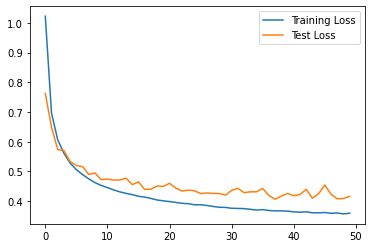

In [66]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

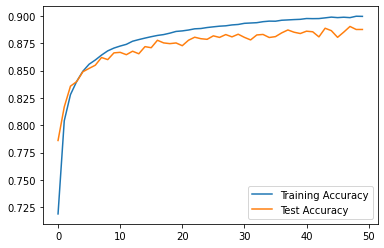

In [67]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [68]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 4s 2ms/step - loss: 0.4161 - accuracy: 0.8877


##  4.3 Make Predictions

In [69]:
predictions = model.predict(X_test)

In [70]:
predictions

array([[9.9550569e-01, 2.7871691e-05, 5.6789670e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.8295122e-12, 1.7179655e-24, 3.8945515e-20, ..., 4.0871663e-23,
        5.5924091e-20, 7.2147320e-20],
       [8.7946290e-01, 8.0380440e-03, 1.5950017e-02, ..., 5.0085325e-28,
        2.3880994e-33, 2.4755187e-36],
       ...,
       [1.8139413e-03, 9.1079346e-06, 2.1641944e-03, ..., 1.0053070e-05,
        2.2217749e-07, 1.2938068e-06],
       [9.7963482e-01, 1.8760546e-03, 1.1475887e-02, ..., 1.7904308e-29,
        1.5880483e-05, 8.8870816e-10],
       [2.5227352e-04, 4.0054172e-02, 1.7109782e-03, ..., 1.0128132e-32,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)